# IMPORTING LIBRARIES

In [1]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_excel("churn data.xlsx")

In [3]:
df.head(3)

,CIF,CUS_DOB,AGE,CUS_Month_Income,CUS_Gender,CUS_Marital_Status,CUS_Customer_Since,YEARS_WITH_US,# total debit transactions for S1,# total debit transactions for S2,...,total credit amount for S2,total credit amount for S3,total debit amount,total debit transactions,total credit amount,total credit transactions,total transactions,CUS_Target,TAR_Desc,Status
0,XXXXXX,Feb 13 1970 12:00AM,49,7116.64,MALE,MARRIED,1994-06-30,25,277,265,...,1764079.61,2378592.62,4758311.63,887,5659653.33,65,952,2231,EXECUTIVE,ACTIVE
1,XXXXXX,Sep 20 1973 12:00AM,46,1500000.00,FEMALE,SINGLE,2005-05-19,14,37,15,...,19500.00,57500.00,139363.22,97,87000.00,10,107,2223,LOW,ACTIVE
2,XXXXXX,Jul 18 1966 12:00AM,53,5000000.00,FEMALE,SINGLE,2005-05-20,14,31,14,...,240311.84,70946.86,37375.46,53,1020883.70,27,80,2222,MIDLE,ACTIVE


In [4]:
df=df.drop(columns=["CIF","CUS_DOB"])

In [5]:
#df['CUS_Customer_Since'] = pd.to_datetime(df['CUS_Customer_Since'],format='%Y%m%d')
df['CUS_Customer_Since'] = pd.DatetimeIndex(df['CUS_Customer_Since']).year
#df['month'] = pd.DatetimeIndex(df['CUS_Customer_Since']).month
#df["day"]= pd.DatetimeIndex(df['CUS_Customer_Since']).day

In [6]:
df['CUS_Customer_Since']


0       1994
1       2005
2       2005
3       2005
4       2014
        ... 
1244    2005
1245    2005
1246    2005
1247    2005
1248    2005
Name: CUS_Customer_Since, Length: 1249, dtype: int64

In [7]:
df["CUS_Customer_Since"].corr(df["YEARS_WITH_US"])

-1.0

In [8]:
df=df.drop(columns=["CUS_Customer_Since"])

In [9]:
df.head()

,AGE,CUS_Month_Income,CUS_Gender,CUS_Marital_Status,YEARS_WITH_US,# total debit transactions for S1,# total debit transactions for S2,# total debit transactions for S3,total debit amount for S1,total debit amount for S2,...,total credit amount for S2,total credit amount for S3,total debit amount,total debit transactions,total credit amount,total credit transactions,total transactions,CUS_Target,TAR_Desc,Status
0,49,7116.64,MALE,MARRIED,25,277,265,345,1459126.64,1230543.08,...,1764079.61,2378592.62,4758311.63,887,5659653.33,65,952,2231,EXECUTIVE,ACTIVE
1,46,1500000.00,FEMALE,SINGLE,14,37,15,45,35372.55,20134.00,...,19500.00,57500.00,139363.22,97,87000.00,10,107,2223,LOW,ACTIVE
2,53,5000000.00,FEMALE,SINGLE,14,31,14,8,28248.85,4777.66,...,240311.84,70946.86,37375.46,53,1020883.70,27,80,2222,MIDLE,ACTIVE
3,15,500.00,FEMALE,SINGLE,14,0,1,0,0.00,4000.00,...,28089.99,18753.92,4000.00,1,76946.96,12,13,2223,LOW,ACTIVE
4,48,9000000.00,FEMALE,SINGLE,5,15,33,12,69083.38,223007.51,...,176000.00,70500.00,338470.29,60,442100.00,21,81,2223,LOW,ACTIVE


In [10]:
df.iloc[:,5:-4].head()

,# total debit transactions for S1,# total debit transactions for S2,# total debit transactions for S3,total debit amount for S1,total debit amount for S2,total debit amount for S3,# total credit transactions for S1,# total credit transactions for S2,# total credit transactions for S3,total credit amount for S1,total credit amount for S2,total credit amount for S3,total debit amount,total debit transactions,total credit amount,total credit transactions
0,277,265,345,1459126.64,1230543.08,2068641.91,10,24,31,1516981.10,1764079.61,2378592.62,4758311.63,887,5659653.33,65
1,37,15,45,35372.55,20134.00,83856.67,2,4,4,10000.00,19500.00,57500.00,139363.22,97,87000.00,10
2,31,14,8,28248.85,4777.66,4348.95,14,8,5,709625.00,240311.84,70946.86,37375.46,53,1020883.70,27
3,0,1,0,0.00,4000.00,0.00,5,4,3,30103.05,28089.99,18753.92,4000.00,1,76946.96,12
4,15,33,12,69083.38,223007.51,46379.40,8,7,6,195600.00,176000.00,70500.00,338470.29,60,442100.00,21


# Univariate Analysis

<AxesSubplot:>

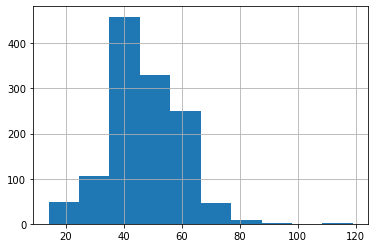

In [11]:
df.AGE.hist()

 Maximum  customers are  from 35 to 65 age group
 

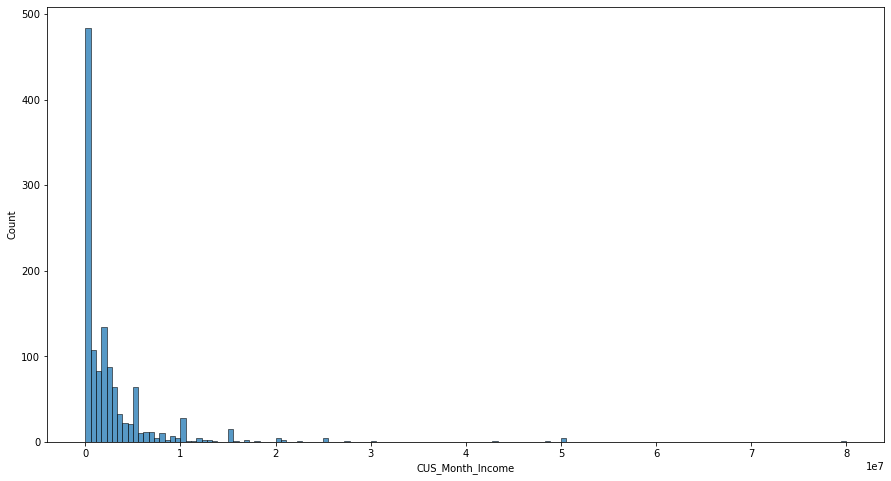

In [12]:
plt.figure(figsize=(15,8))
sns.histplot(x=df.CUS_Month_Income,palette="Set2")
plt.show()

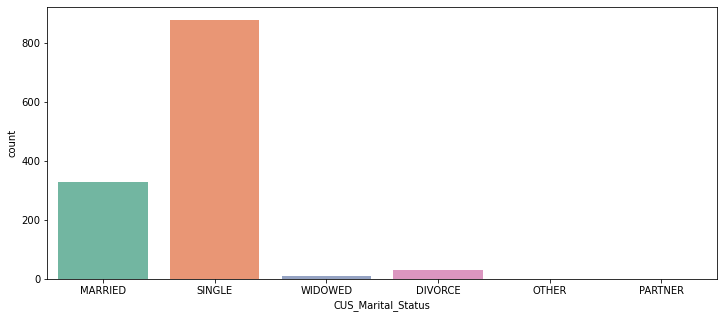

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,5))
sns.countplot(x=df.CUS_Marital_Status,palette="Set2")
plt.show()

Most customers are single and married

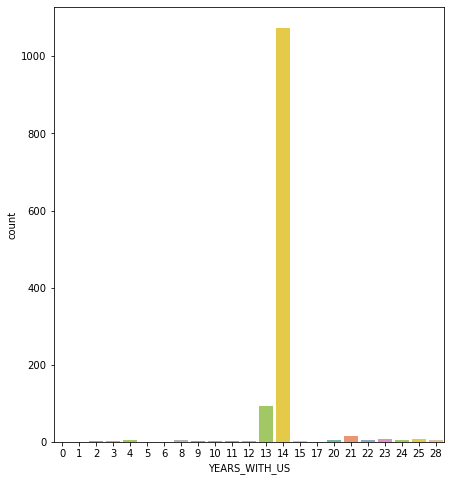

In [14]:
plt.figure(figsize=(7,8))
sns.countplot(x=df.YEARS_WITH_US,palette="Set2")
plt.show()

1100 customers stayed  with the bank for 14 years,
100 customers stayed with the bank for 13 years

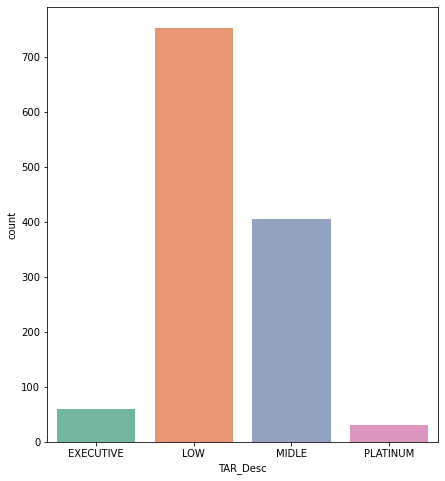

In [15]:
plt.figure(figsize=(7,8))
sns.countplot(x=df.TAR_Desc,palette="Set2")
plt.show()

# TAR-Transaction Amount Record

Maximum customers are of low Record

# Bivariate Analysis

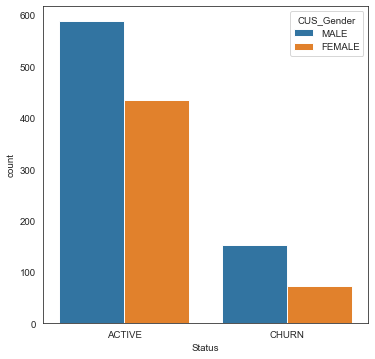

In [16]:
sns.set_style("white")
plt.figure(figsize=(6,6), dpi=70)
sns.countplot(data=df, x="Status", hue="CUS_Gender")
plt.show()

1.Imabalanced data set                                          
2.male customers are more compare to female customers

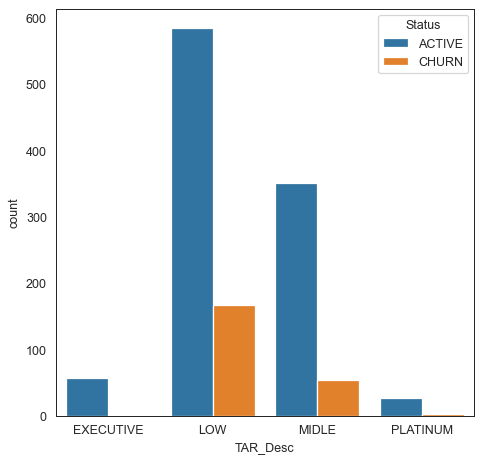

In [17]:
plt.figure(figsize=(6,6), dpi=90)
sns.countplot(data=df, x="TAR_Desc", hue="Status")
plt.show()

churncustomers are in low and middle--> TAR

# outliers Representation

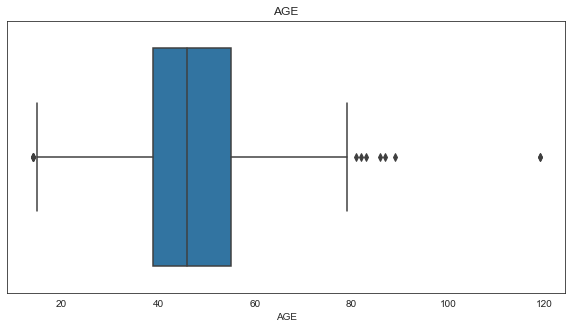

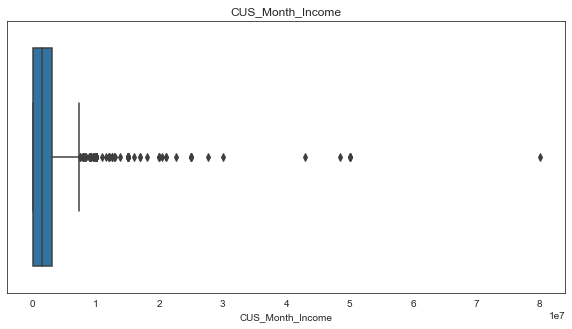

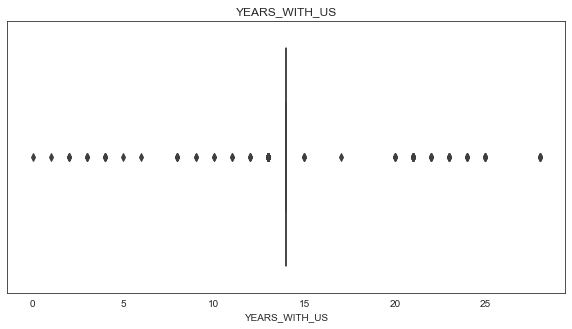

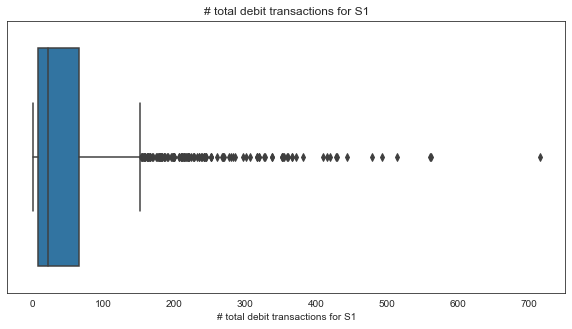

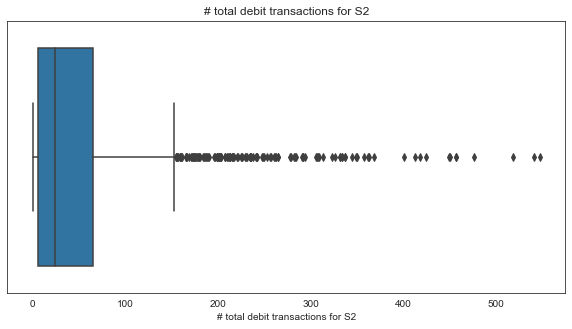

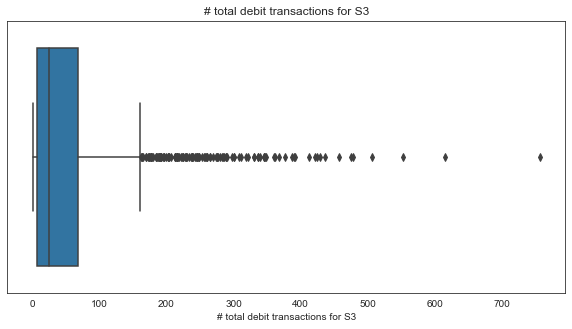

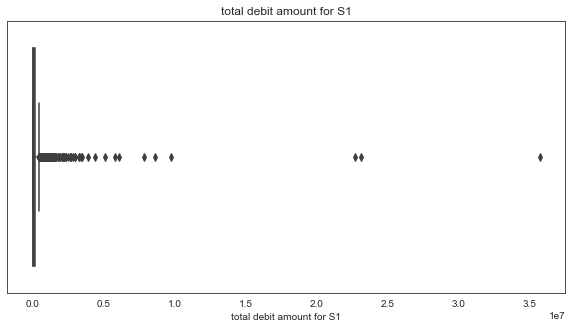

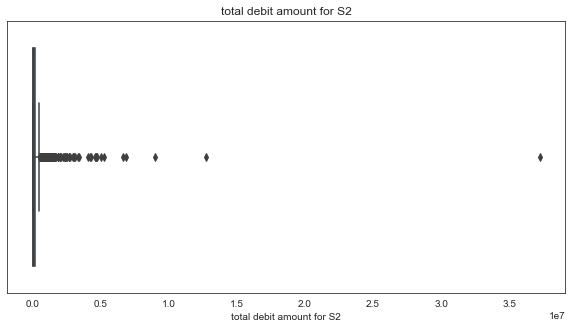

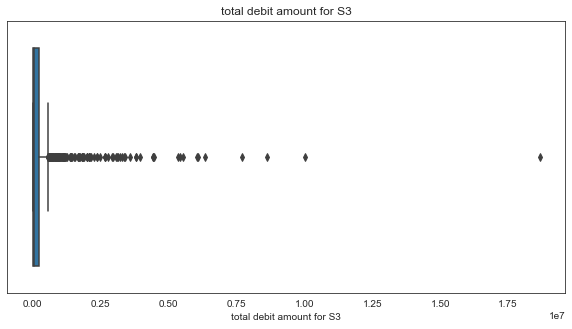

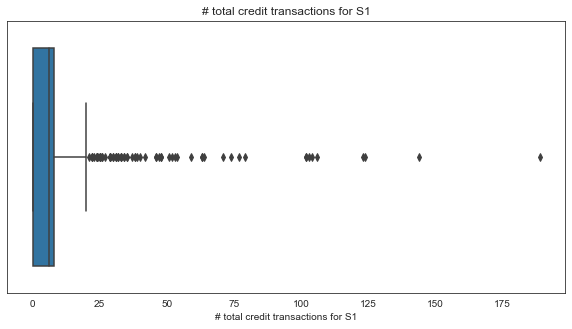

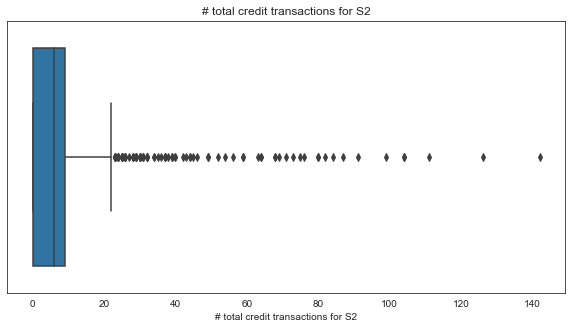

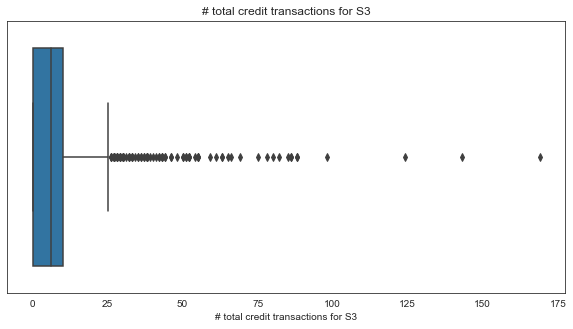

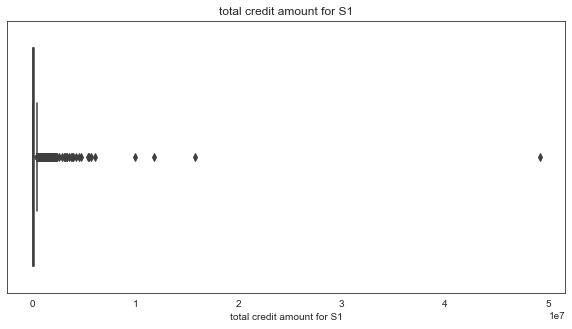

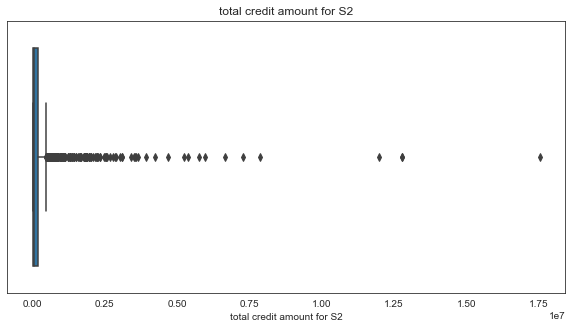

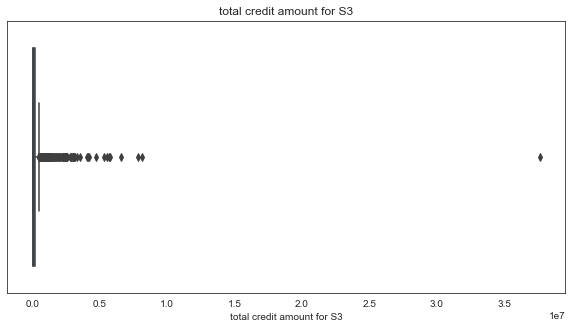

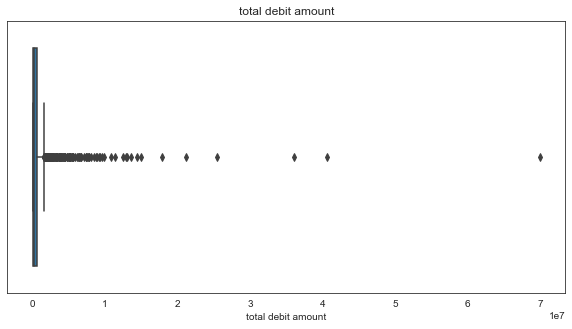

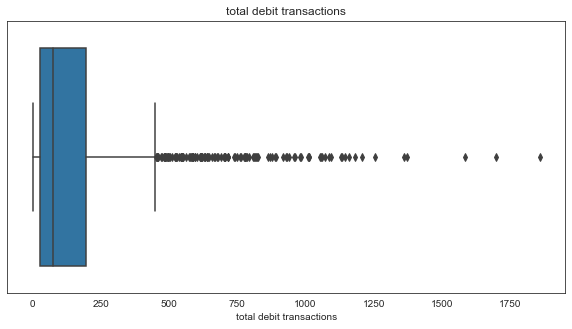

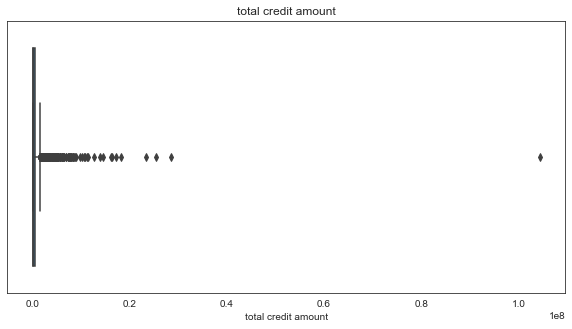

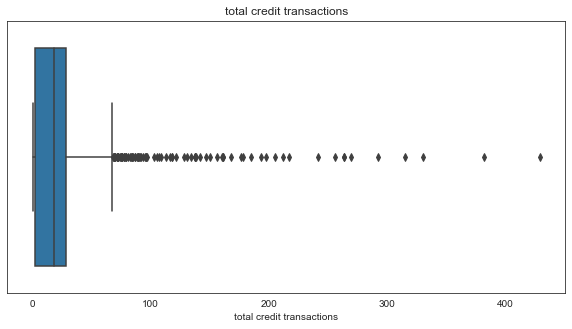

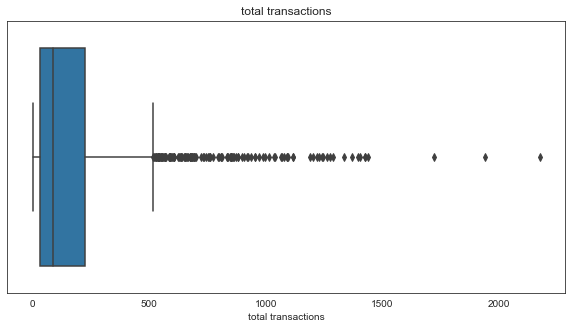

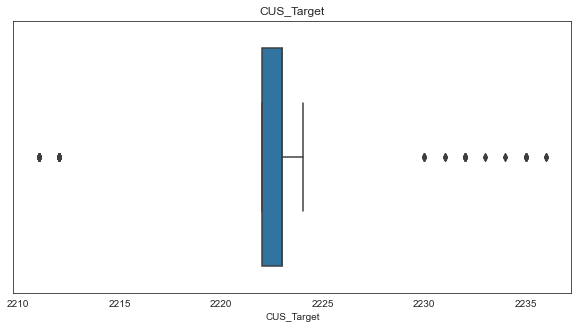

In [18]:
for col in df._get_numeric_data():
  plt.figure(figsize=(10,5))
  sns.boxplot(df[col])
  plt.title(col)
  plt.show()

# distribution of the features

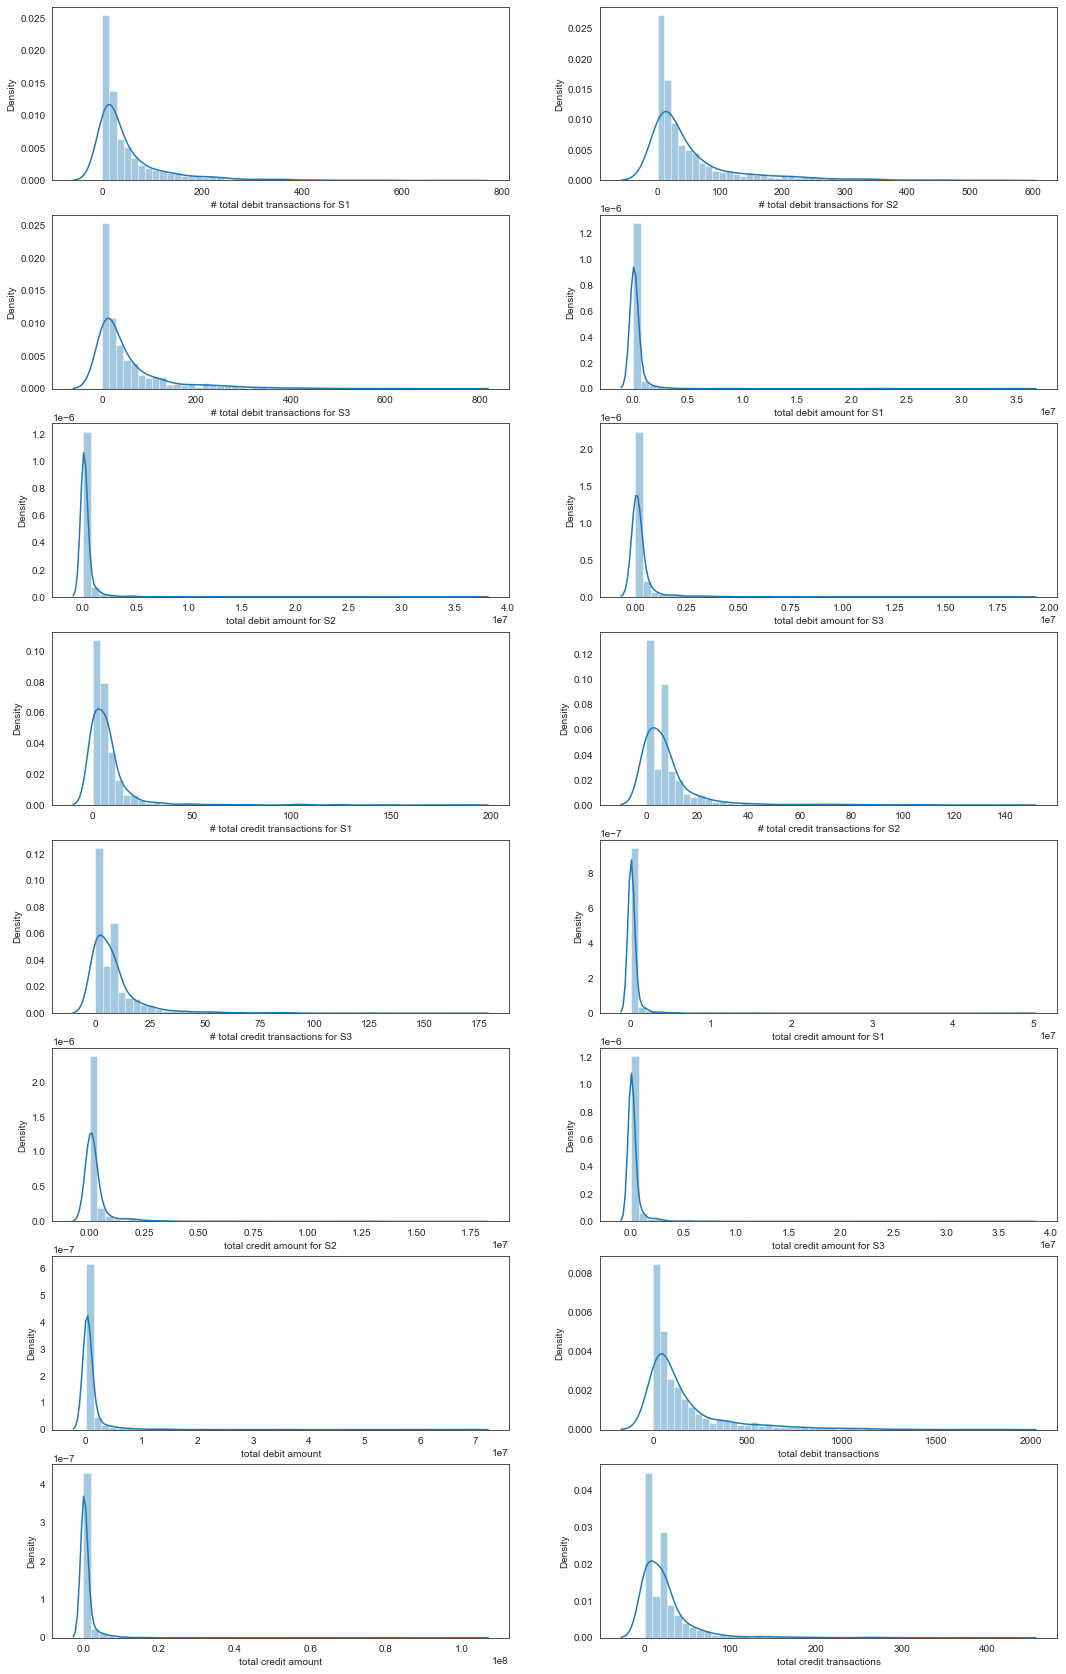

In [19]:
dist_income=df.iloc[:,5:-4]
plt.figure(figsize=(18,30),facecolor="white")
plotnumber=1
for column in dist_income:
    if plotnumber<=16:
        ax=plt.subplot(8,2,plotnumber)
        sns.distplot(dist_income[column])
        plt.xlabel(column,fontsize=10)
    plotnumber +=1
plt.show()


# checking for distribution and normality

In [20]:
from scipy import stats
def diagnostic_plot(df,variable):
    plt.figure(figsize=(16,4))
    
    plt.subplot(1,3,1)
    sns.distplot(x=df[variable],bins=10)
    plt.title("Histogram")
    
    plt.subplot(1,3,2)
    stats.probplot(df[variable],dist="norm",plot=plt)
    
    
    plt.subplot(1,3,3)
    sns.boxplot(y=df[variable])
    plt.title("boxplot")
plt.show()
    

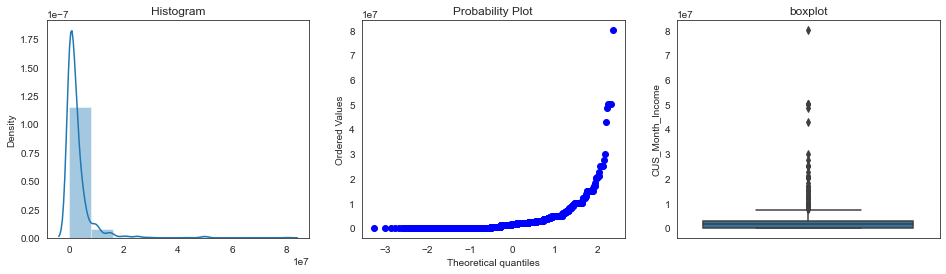

In [21]:
diagnostic_plot(df,"CUS_Month_Income")

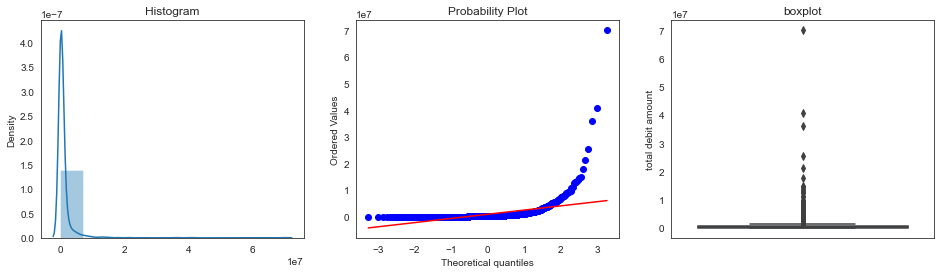

In [22]:
diagnostic_plot(df,"total debit amount")

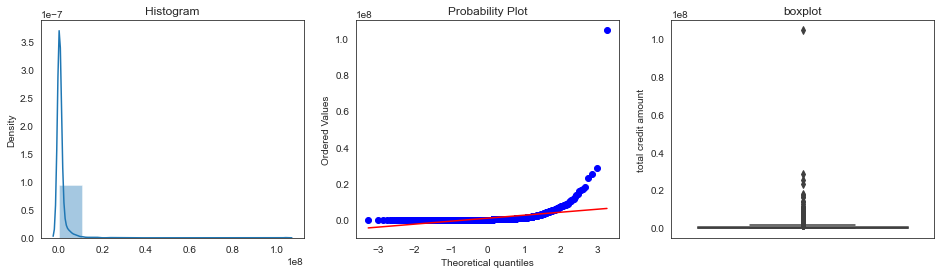

In [23]:
diagnostic_plot(df,"total credit amount")

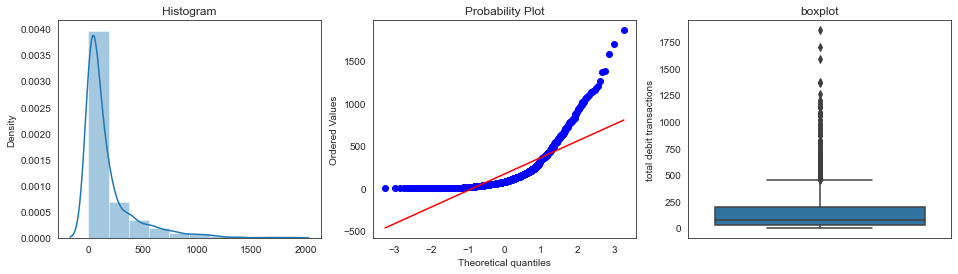

In [24]:
diagnostic_plot(df,"total debit transactions")

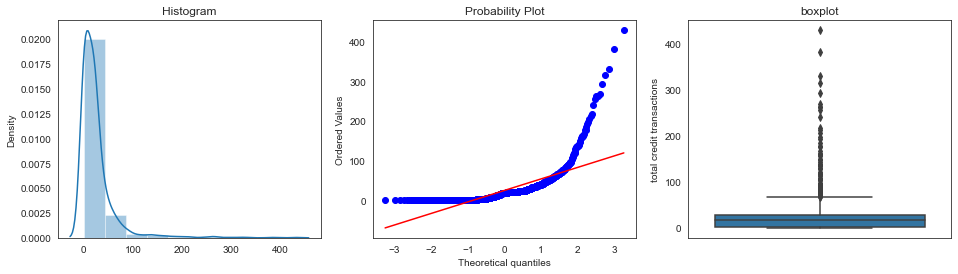

In [25]:
diagnostic_plot(df,"total credit transactions")

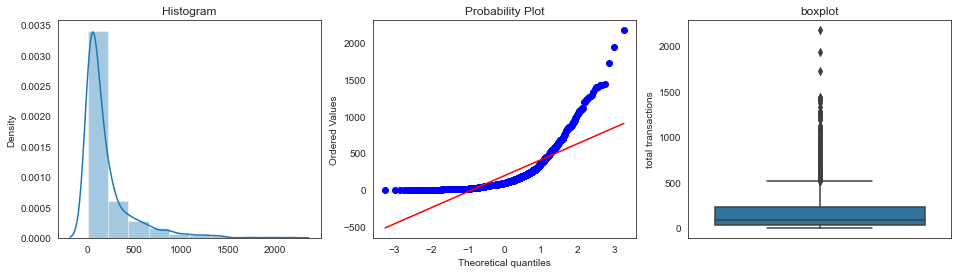

In [26]:
diagnostic_plot(df,"total transactions")

# Missing Values

In [27]:
df.isnull().sum()

AGE                                    0
CUS_Month_Income                      11
CUS_Gender                             2
CUS_Marital_Status                     0
YEARS_WITH_US                          0
# total debit transactions for S1      0
# total debit transactions for S2      0
# total debit transactions for S3      0
total debit amount for S1              0
total debit amount for S2              0
total debit amount for S3              0
# total credit transactions for S1     0
# total credit transactions for S2     0
# total credit transactions for S3     0
total credit amount for S1             0
total credit amount for S2             0
total credit amount for S3             0
total debit amount                     0
total debit transactions               0
total credit amount                    0
total credit transactions              0
total transactions                     0
CUS_Target                             0
TAR_Desc                               0
Status          

In [28]:
#df["CUS_Month_Income"]=df["CUS_Month_Income"].fillna()

In [29]:
df=df.fillna(value=df["CUS_Month_Income"].median())

In [30]:
df=df.fillna(value=df["CUS_Gender"].mode())


In [31]:
df.isnull().sum()

AGE                                   0
CUS_Month_Income                      0
CUS_Gender                            0
CUS_Marital_Status                    0
YEARS_WITH_US                         0
# total debit transactions for S1     0
# total debit transactions for S2     0
# total debit transactions for S3     0
total debit amount for S1             0
total debit amount for S2             0
total debit amount for S3             0
# total credit transactions for S1    0
# total credit transactions for S2    0
# total credit transactions for S3    0
total credit amount for S1            0
total credit amount for S2            0
total credit amount for S3            0
total debit amount                    0
total debit transactions              0
total credit amount                   0
total credit transactions             0
total transactions                    0
CUS_Target                            0
TAR_Desc                              0
Status                                0


# Outliers

In [32]:
def capping(df,feature):
    iqr=df[feature].quantile(0.75) - df[feature].quantile(0.25)
    lower_bridg=df[feature].quantile(0.25)-iqr*3
    upper_bridg=df[feature].quantile(0.75)+iqr*3
    return (iqr,lower_bridg,upper_bridg)



    

In [33]:
capping(df,"total debit amount")

(604957.28, -1758448.34, 2476252.62)

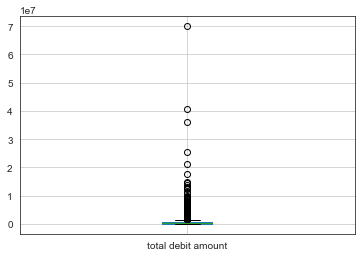

In [34]:
figure=df.boxplot("total debit amount")

In [35]:
df.loc[df["total debit amount"]>=2476252.62,"total debit amount"]=2476252.62


In [36]:
df.loc[df["total debit amount"]<=-1758449,"total debit amount"]=-1758448


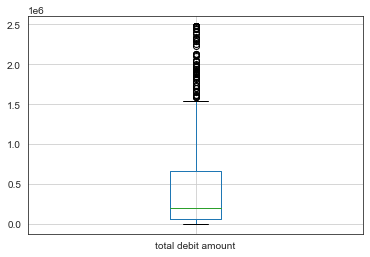

In [37]:
figure=df.boxplot("total debit amount")

In [38]:
capping(df,"total credit amount")

(570208.0800000001, -1695506.8000000003, 2295949.7600000002)

In [39]:
df.loc[df["total credit amount"]>=2295949,"total credit amount"]=2295949
df.loc[df["total credit amount"]<=-1695506,"total credit amount"]=-1695506


In [40]:
capping(df,"CUS_Month_Income")

(2991917.0, -8967668.0, 11975751.0)

In [41]:
df.loc[df["CUS_Month_Income"]>=11975751.0,"CUS_Month_Income"]=11975751.0
df.loc[df["CUS_Month_Income"]<=-8967668.0,"CUS_Month_Income"]=-8967668.0


In [42]:
capping(df,"total debit transactions")

(170.0, -484.0, 706.0)

In [43]:
df.loc[df["total debit transactions"]>=706,"total debit transactions"]=706
df.loc[df["total debit transactions"]<=-484,"total debit transactions"]=-484


In [44]:
capping(df,"total credit transactions")

(26.0, -76.0, 106.0)

In [45]:
df.loc[df["total credit transactions"]>=106,"total credit transactions"]=106
df.loc[df["total credit transactions"]<=-76,"total credit transactions"]=-76


# cleaning Unwanted values

In [49]:
df['CUS_Gender'].unique()

array(['MALE', 'FEMALE', 1500000.0], dtype=object)

In [50]:
df['CUS_Gender']=df['CUS_Gender'].replace(1500000.0,"MALE")

# Labelencoding

In [51]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['CUS_Marital_Status'] = le.fit_transform(df['CUS_Marital_Status'])
df['CUS_Gender']= le.fit_transform(df['CUS_Gender'])
df['Status']= le.fit_transform(df['Status'])


In [52]:
df['TAR_Desc']=df['TAR_Desc'].map({'EXECUTIVE':0,'LOW':1,'MIDLE':2,'PLATINUM':3})
df.head()

,AGE,CUS_Month_Income,CUS_Gender,CUS_Marital_Status,YEARS_WITH_US,# total debit transactions for S1,# total debit transactions for S2,# total debit transactions for S3,total debit amount for S1,total debit amount for S2,...,total credit amount for S2,total credit amount for S3,total debit amount,total debit transactions,total credit amount,total credit transactions,total transactions,CUS_Target,TAR_Desc,Status
0,49,7116.64,1,1,25,277,265,345,1459126.64,1230543.08,...,1764079.61,2378592.62,2476252.62,706,2295949.00,65,952,2226,0,0
1,46,1500000.00,0,4,14,37,15,45,35372.55,20134.00,...,19500.00,57500.00,139363.22,97,87000.00,10,107,2223,1,0
2,53,5000000.00,0,4,14,31,14,8,28248.85,4777.66,...,240311.84,70946.86,37375.46,53,1020883.70,27,80,2222,2,0
3,15,500.00,0,4,14,0,1,0,0.00,4000.00,...,28089.99,18753.92,4000.00,1,76946.96,12,13,2223,1,0
4,48,9000000.00,0,4,5,15,33,12,69083.38,223007.51,...,176000.00,70500.00,338470.29,60,442100.00,21,81,2223,1,0


In [53]:
df["TAR_Desc"].unique()

array([0, 1, 2, 3], dtype=int64)

# correlation

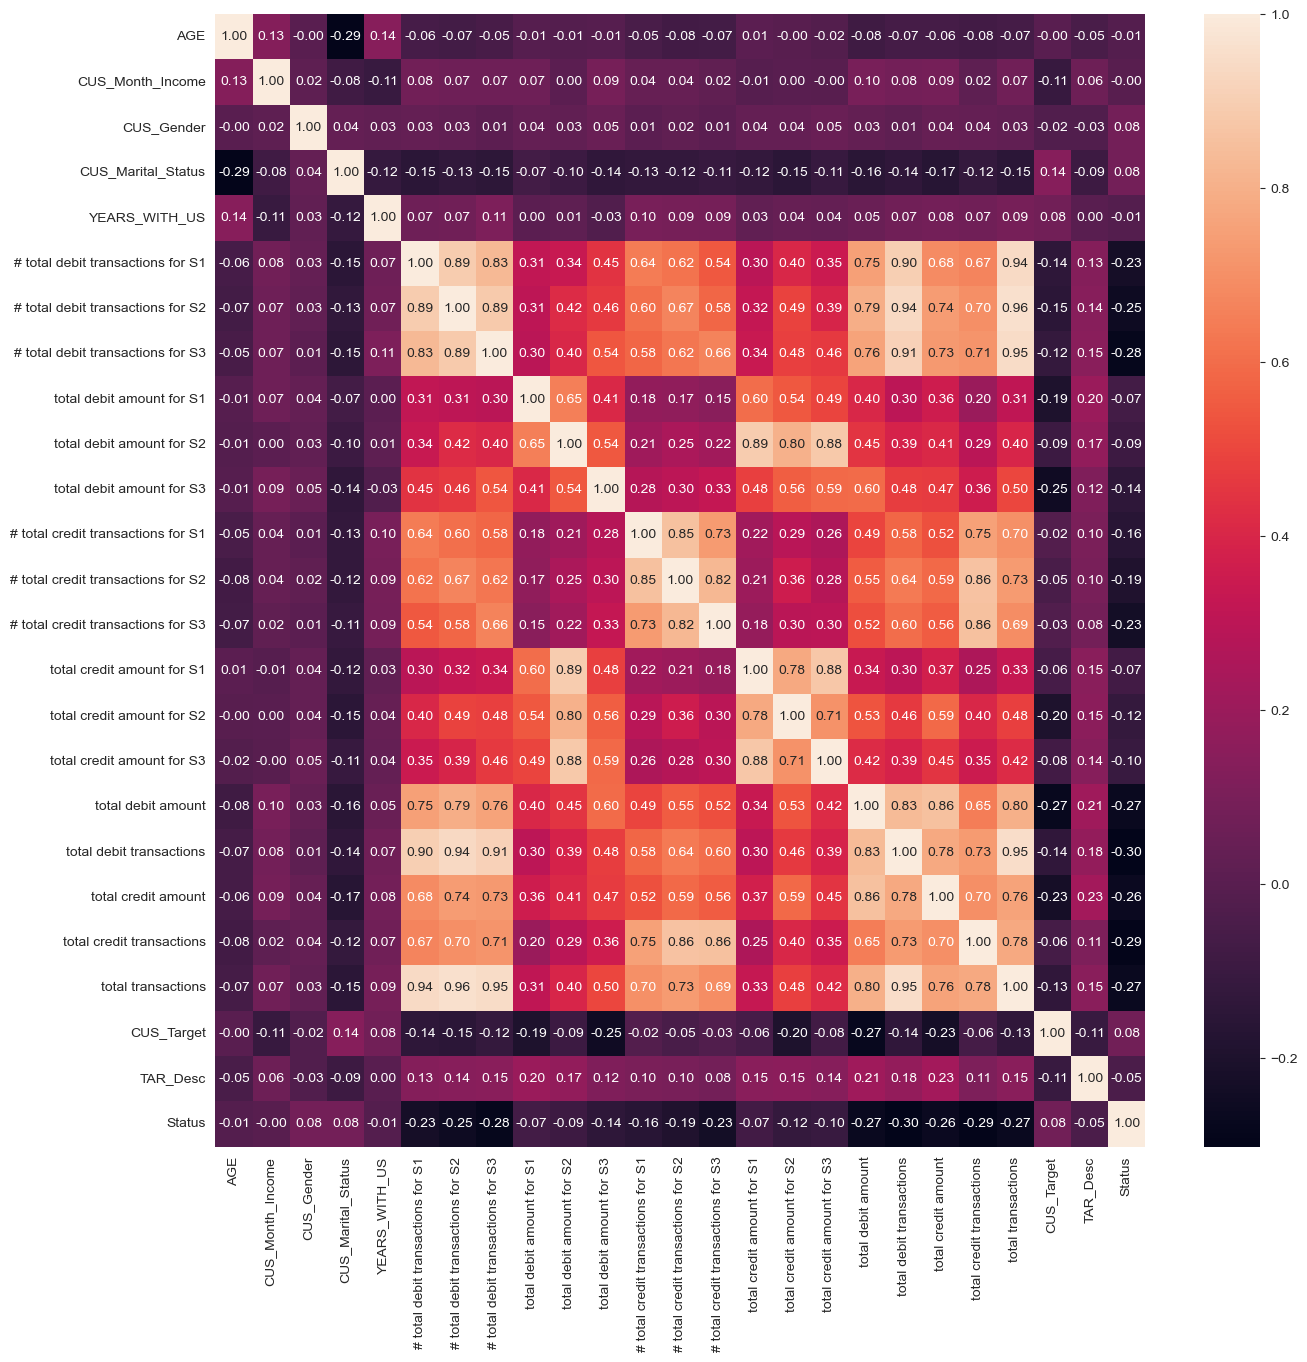

In [54]:
plt.figure(figsize=(15,15), dpi=100)
sns.heatmap(df.corr(), annot=True,fmt=".2f")
plt.show()

# Dropping highly correlated features

In [55]:
df=df.drop(columns=['# total debit transactions for S1',
       '# total debit transactions for S2',
       '# total debit transactions for S3', 'total debit amount for S1',
       'total debit amount for S2', 'total debit amount for S3',
       '# total credit transactions for S1',
       '# total credit transactions for S2',
       '# total credit transactions for S3', 'total credit amount for S1',
       'total credit amount for S2', 'total credit amount for S3','total transactions'])

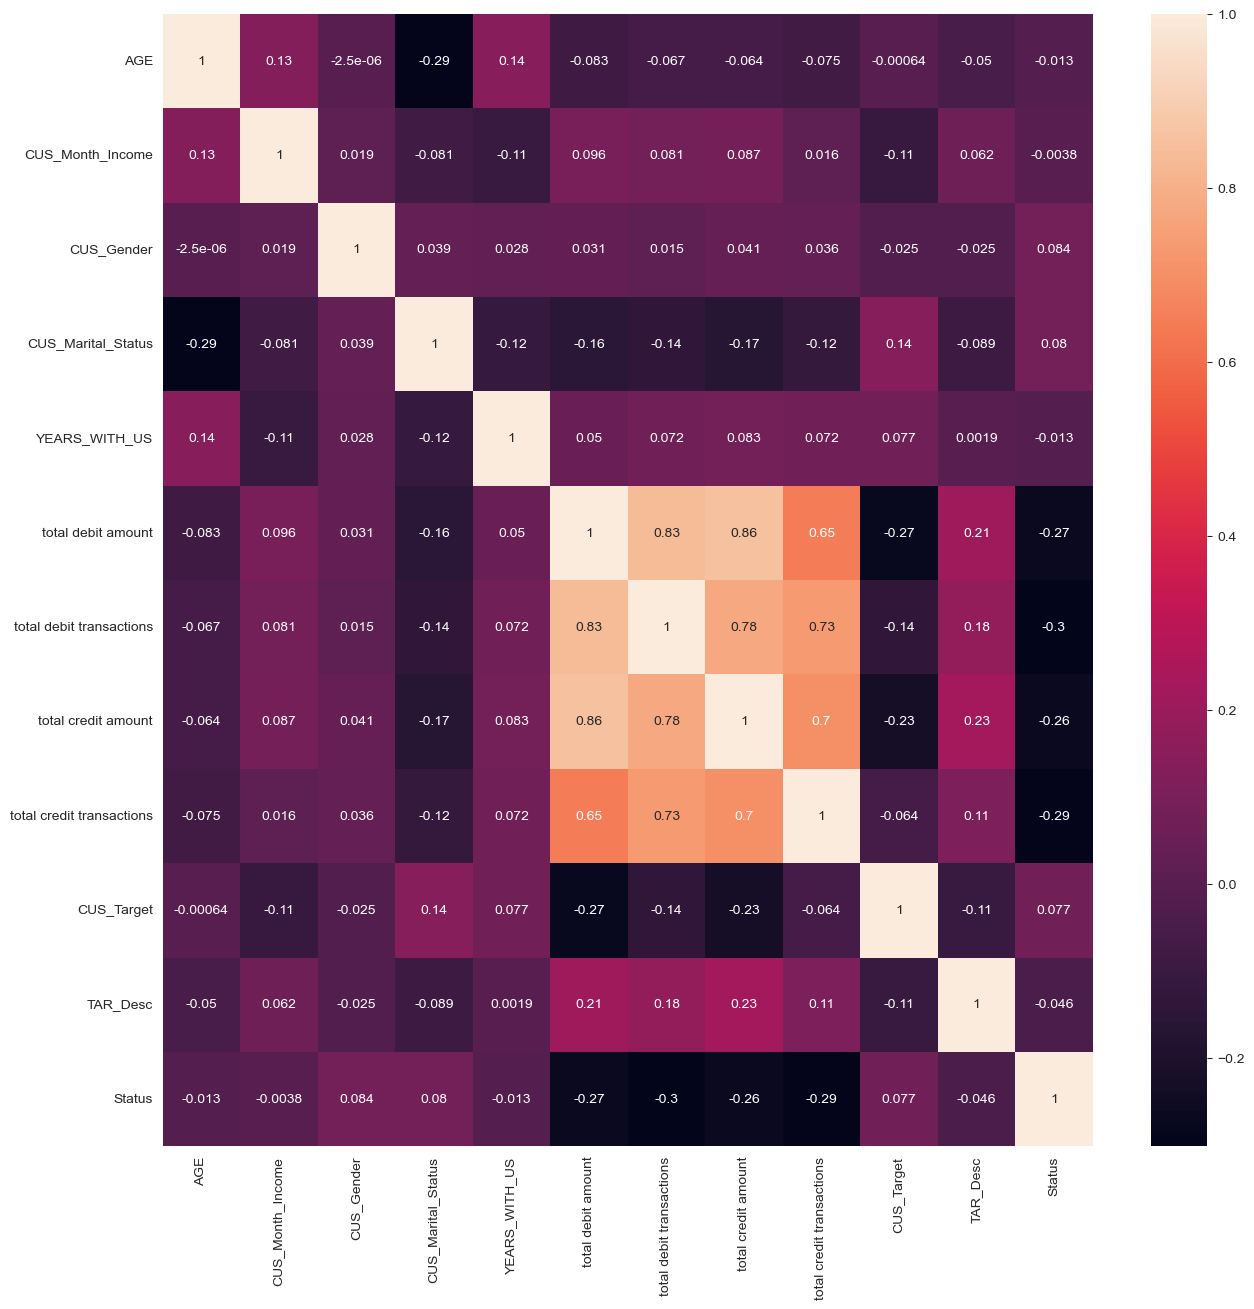

In [56]:
plt.figure(figsize=(15,15),dpi=100)
sns.heatmap(df.corr(), annot=True)
plt.show()

# splitting of the data

In [57]:
x=df.drop(["Status"],axis=1)

In [58]:
y=df["Status"]


In [59]:
df["Status"].value_counts()

0    1022
1     227
Name: Status, dtype: int64

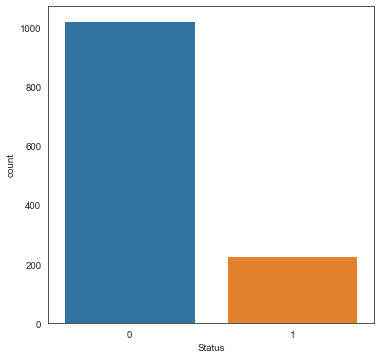

In [60]:
sns.set_style("white")
plt.figure(figsize=(6,6), dpi=70)
sns.countplot(data=df, x="Status")
plt.show()

# Handling imbalanced data set( 0-NOCHURN / 1-CHURN )

# [over sampling]

In [61]:
from imblearn.over_sampling import RandomOverSampler
#from imblearn.under_sampling import NearMiss


In [62]:
#nms=NearMiss()
#r,s=nms.fit_resample(x,y)

In [63]:
smk = RandomOverSampler(random_state=40)
X,Y=smk.fit_resample(x,y)

In [64]:
y.value_counts()

0    1022
1     227
Name: Status, dtype: int64

In [65]:
Y.value_counts()

0    1022
1    1022
Name: Status, dtype: int64

# train test split

In [66]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.25, random_state=99)

In [67]:
# using standard scaler to minimize the standard deviation
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train.iloc[:,[0,1,4,5,6,7,8,9]])

x_train.iloc[:,[0,1,4,5,6,7,8,9]] = scaler.transform(x_train.iloc[:,[0,1,4,5,6,7,8,9]])
x_test.iloc[:,[0,1,4,5,6,7,8,9]] = scaler.transform(x_test.iloc[:,[0,1,4,5,6,7,8,9]])

In [68]:
x_train.iloc[:,[0,1,4,5,6,7,8,9]].std()

AGE                          1.000326
CUS_Month_Income             1.000326
YEARS_WITH_US                1.000326
total debit amount           1.000326
total debit transactions     1.000326
total credit amount          1.000326
total credit transactions    1.000326
CUS_Target                   1.000326
dtype: float64

In [69]:
X_train=x_train.astype(np.float32)
X_test=x_test.astype(np.float32)

In [70]:
X_train.std()

AGE                          1.000328
CUS_Month_Income             1.000324
CUS_Gender                   0.484801
CUS_Marital_Status           1.339481
YEARS_WITH_US                1.000331
total debit amount           1.000327
total debit transactions     1.000325
total credit amount          1.000327
total credit transactions    1.000327
CUS_Target                   1.000335
TAR_Desc                     0.559574
dtype: float32

In [71]:
from sklearn.linear_model import LogisticRegression
ml = LogisticRegression()
ml.fit(X_train,y_train)

LogisticRegression()

In [72]:
y_pred=ml.predict(X_test)

In [73]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [74]:
print('Accuracy {} %'.format(100 * accuracy_score(y_pred, y_test)))


Accuracy 75.73385518590999 %


In [75]:
print(ml.score(X_train, y_train)) # train accu
print(ml.score(X_test, y_test)) # test accu

0.7742987606001305
0.7573385518590998


[[171  30]
 [ 94 216]]


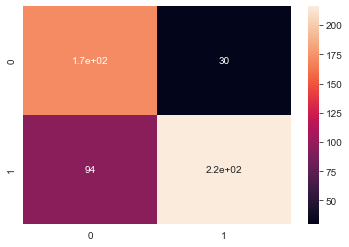

In [76]:
cm = confusion_matrix(y_pred, y_test)
print(cm)
sns.heatmap(cm, annot=True)
plt.show()

In [77]:
cr = classification_report(y_pred, y_test)
print(cr)

              precision    recall  f1-score   support

           0       0.65      0.85      0.73       201
           1       0.88      0.70      0.78       310

    accuracy                           0.76       511
   macro avg       0.76      0.77      0.76       511
weighted avg       0.79      0.76      0.76       511



In [78]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [79]:
y_pred=knn.predict(X_test)

In [80]:
print('Accuracy {} %'.format(100 * accuracy_score(y_pred, y_test)))

Accuracy 78.86497064579257 %


In [81]:
cr = classification_report(y_pred, y_test)
print(cr)

              precision    recall  f1-score   support

           0       0.63      0.94      0.76       179
           1       0.96      0.71      0.81       332

    accuracy                           0.79       511
   macro avg       0.79      0.82      0.78       511
weighted avg       0.84      0.79      0.79       511



In [82]:
from sklearn.ensemble import RandomForestClassifier
churn = RandomForestClassifier(random_state=40)
churn.fit(X_train, y_train)

RandomForestClassifier(random_state=40)

In [83]:
y_pred4=churn.predict(X_test)

In [84]:
print('Accuracy {} %'.format(100 * accuracy_score(y_pred4, y_test)))

Accuracy 94.71624266144813 %


In [85]:
print(churn.score(X_train, y_train)) # train accu
print(churn.score(X_test, y_test)) # test accu

1.0
0.9471624266144814


In [86]:
cr = classification_report(y_pred4, y_test)
print(cr)

              precision    recall  f1-score   support

           0       0.90      1.00      0.95       238
           1       1.00      0.90      0.95       273

    accuracy                           0.95       511
   macro avg       0.95      0.95      0.95       511
weighted avg       0.95      0.95      0.95       511



[[238   0]
 [ 27 246]]


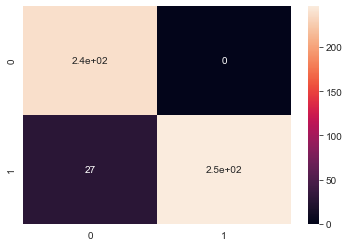

In [87]:
cm = confusion_matrix(y_pred4, y_test)
print(cm)
sns.heatmap(cm, annot=True)
plt.show()

In [88]:
import xgboost as xgb

xgb_cl = xgb.XGBClassifier(random_state=30)


In [89]:
xgb_cl.fit(X_train, y_train)
y_pred=xgb_cl.predict(X_test)


In [90]:
print('Accuracy {} %'.format(100 * accuracy_score(y_pred, y_test)))

Accuracy 93.73776908023484 %


In [91]:


print(xgb_cl.score(X_train, y_train)) # train accu
print(xgb_cl.score(X_test, y_test)) # test accu

1.0
0.9373776908023483


In [92]:
cr = classification_report(y_pred, y_test)
print(cr)

              precision    recall  f1-score   support

           0       0.89      0.99      0.94       239
           1       0.99      0.89      0.94       272

    accuracy                           0.94       511
   macro avg       0.94      0.94      0.94       511
weighted avg       0.94      0.94      0.94       511



[[236   3]
 [ 29 243]]


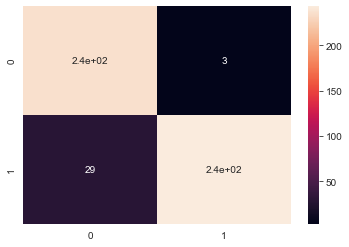

In [93]:
cm = confusion_matrix(y_pred, y_test)
print(cm)
sns.heatmap(cm, annot=True)
plt.show()

In [95]:
import pickle
pickle.dump(churn,open("churn_model2.pkl","wb"))


In [96]:
ml=pickle.load(open("churn_model2.pkl","rb"))
